Epoch 1/10
235/235 [==============================] - 43s 180ms/step - loss: 0.1860 - val_loss: 0.0686
Epoch 2/10
235/235 [==============================] - 40s 172ms/step - loss: 0.0633 - val_loss: 0.0598
Epoch 3/10
235/235 [==============================] - 37s 158ms/step - loss: 0.0596 - val_loss: 0.0591
Epoch 4/10
235/235 [==============================] - 37s 159ms/step - loss: 0.0592 - val_loss: 0.0587
Epoch 5/10
235/235 [==============================] - 37s 158ms/step - loss: 0.0590 - val_loss: 0.0586
Epoch 6/10
235/235 [==============================] - 38s 160ms/step - loss: 0.0589 - val_loss: 0.0585
Epoch 7/10
235/235 [==============================] - 37s 159ms/step - loss: 0.0588 - val_loss: 0.0585
Epoch 8/10
235/235 [==============================] - 37s 159ms/step - loss: 0.0588 - val_loss: 0.0584
Epoch 9/10
235/235 [==============================] - 39s 167ms/step - loss: 0.0587 - val_loss: 0.0584
Epoch 10/10
313/313 [==============================] - 3s 10ms/step


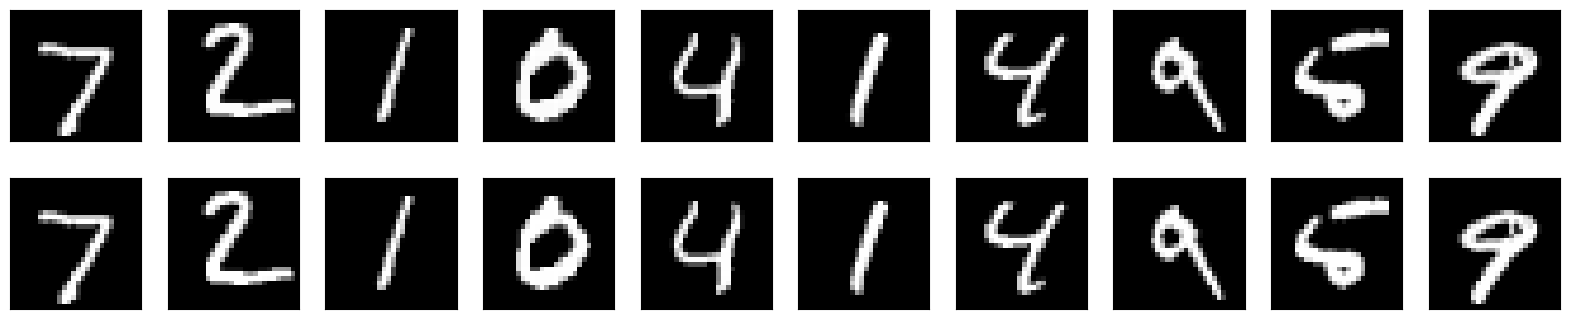

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Define the autoencoder architecture
input_img = Input(shape=(28, 28, 1))
encoded = Dense(64, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(1, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode some digits from the test set
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Plot the results
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
